In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import torch
import os
from rdkit import Chem
from rdkit.Geometry import Point3D

In [3]:
from utils_eval import build_pdb_dict, center2zero, pp_match
from pp_matching_specific_site import compute_center

In [116]:
# ligand_name = '1ywn_A_rec_1ywn_lif_lig_tt_docked_0'
# ligand_name = '4b81_B_rec_4ara_c56_lig_tt_min_0'
# ligand_name = '1lhu_A_rec_1lhn_aon_lig_tt_min_0'
# ligand_name = '4b84_A_rec_4b84_z5k_lig_tt_min_0'
# ligand_name = '3fu5_A_rec_5ni6_dj3_lig_tt_min_0'
# ligand_name = '5hbh_A_rec_5idn_6a7_lig_tt_min_0'
# ligand_name = '5aen_A_rec_5ni2_dj3_lig_tt_min_0'
# ligand_name = '3d3e_B_rec_4ijw_1eq_lig_tt_min_0'
# ligand_name = '4yyz_B_rec_3ey4_352_lig_tt_docked_12'
# ligand_name = '4h7c_A_rec_3r58_nps_lig_tt_min_0'
ligand_name = '3ey4_C_rec_4k1l_sff_lig_tt_min_0'

# folder_name = ligand_name[ligand_name.rfind('rec')+4:ligand_name.rfind('rec')+8]
folder_name = ligand_name

In [117]:
raw_data_path = '../../data/cleaned_crossdocked_data/raw'
pdb_dict, pdb_rev_dict = build_pdb_dict(raw_data_path)

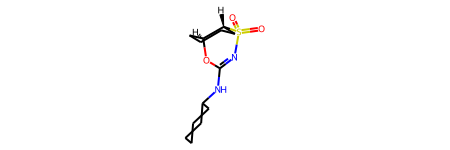

In [118]:
pdb_folder = pdb_rev_dict[ligand_name+'.sdf']
ref_file = os.path.join(raw_data_path, pdb_folder, ligand_name+'.sdf')
ref_m = Chem.MolFromMolFile(ref_file)
ref_m

In [119]:
ref_m.GetNumConformers()

1

In [120]:
conf = ref_m.GetConformer()
atom_positions = conf.GetPositions()

atom_positions

array([[ 5.11430e+00, -1.92840e+00,  1.21171e+01],
       [ 4.24820e+00, -1.40200e+00,  1.30912e+01],
       [ 4.04000e+00, -5.20000e-03,  1.33159e+01],
       [ 3.15600e+00,  1.96900e-01,  1.45468e+01],
       [ 3.88410e+00, -2.40800e-01,  1.58179e+01],
       [ 5.19510e+00,  5.26100e-01,  1.59691e+01],
       [ 6.08430e+00,  2.95500e-01,  1.47510e+01],
       [ 5.36060e+00,  7.49400e-01,  1.34823e+01],
       [ 6.34570e+00,  4.26300e-01,  1.20436e+01],
       [ 5.92880e+00,  1.34680e+00,  1.09319e+01],
       [ 7.80400e+00,  6.22800e-01,  1.23497e+01],
       [ 6.05530e+00, -1.21260e+00,  1.15804e+01],
       [ 4.97880e+00, -3.29360e+00,  1.17219e+01],
       [ 4.40190e+00, -4.52390e+00,  1.37575e+01],
       [ 3.38580e+00, -5.47780e+00,  1.43789e+01],
       [ 3.28810e+00, -6.75470e+00,  1.35485e+01],
       [ 2.88920e+00, -6.42070e+00,  1.21133e+01],
       [ 3.90490e+00, -5.46500e+00,  1.14934e+01],
       [ 3.99810e+00, -4.18590e+00,  1.23211e+01]])

In [121]:
# th_data = 'pharmacophore_specific_eval/3r58/4h7c_A_rec_3r58_nps_lig_tt_min_0.pt'
# th_data = os.path.join('pharmacophore_specific_eval', folder_name, ligand_name+'.pt')
th_data = os.path.join('structure_based', folder_name, ligand_name+'.pt')
data = torch.load(th_data)
data.target_pos

tensor([[ 5.1262e+00, -1.9287e+00,  1.2109e+01],
        [ 4.2482e+00, -1.4062e+00,  1.3094e+01],
        [ 4.0491e+00,  4.1245e-03,  1.3333e+01],
        [ 3.1664e+00,  1.9756e-01,  1.4546e+01],
        [ 3.8706e+00, -2.4670e-01,  1.5821e+01],
        [ 5.1789e+00,  5.1731e-01,  1.5988e+01],
        [ 6.0729e+00,  3.0379e-01,  1.4746e+01],
        [ 5.3667e+00,  7.3690e-01,  1.3493e+01],
        [ 6.3371e+00,  4.1565e-01,  1.2051e+01],
        [ 5.9204e+00,  1.3553e+00,  1.0929e+01],
        [ 7.8074e+00,  6.3034e-01,  1.2365e+01],
        [ 6.0478e+00, -1.2201e+00,  1.1594e+01],
        [ 4.9685e+00, -3.2879e+00,  1.1728e+01],
        [ 4.3990e+00, -4.5363e+00,  1.3754e+01],
        [ 3.3793e+00, -5.4975e+00,  1.4392e+01],
        [ 3.2879e+00, -6.7524e+00,  1.3565e+01],
        [ 2.9050e+00, -6.4117e+00,  1.2118e+01],
        [ 3.8962e+00, -5.4618e+00,  1.1492e+01],
        [ 3.9987e+00, -4.1903e+00,  1.2317e+01],
        [ 5.1262e+00, -1.9287e+00,  1.2109e+01],
        [ 4.2482e+00

In [122]:
center = compute_center(data['target_pos'], data['Gt_mask']).numpy()
center

array([ 4.738236 , -1.9357244, 13.1281   ], dtype=float32)

In [123]:
for i in range(ref_m.GetNumAtoms()):
    x,y,z = atom_positions[i] - center
    print(x, y, z)
    conf.SetAtomPosition(i,Point3D(x,y,z))

0.37606404953002937 0.007324377632141221 -1.011000395202636
-0.49003595046997095 0.5337243776321412 -0.036900395202636105
-0.6982359504699707 1.930524377632141 0.18779960479736246
-1.5822359504699706 2.132624377632141 1.4186996047973626
-0.8541359504699706 1.6949243776321412 2.689799604797363
0.45686404953002935 2.461824377632141 2.8409996047973625
1.3460640495300291 2.231224377632141 1.6228996047973627
0.6223640495300291 2.685124377632141 0.3541996047973637
1.6074640495300292 2.362024377632141 -1.084500395202637
1.1905640495300291 3.282524377632141 -2.196200395202636
3.0657640495300296 2.558524377632141 -0.7784003952026364
1.3170640495300292 0.7231243776321412 -1.5477003952026376
0.24056404953002897 -1.357875622367859 -1.406200395202637
-0.33633595046997034 -2.588175622367859 0.6293996047973636
-1.3524359504699706 -3.542075622367859 1.250799604797363
-1.4501359504699707 -4.818975622367859 0.42039960479736393
-1.8490359504699705 -4.484975622367859 -1.014800395202636
-0.8333359504699707

In [124]:
# ref_m.AddConformer(conf)
for conformer in ref_m.GetConformers():
    print(conformer.GetPositions())

[[ 0.37606405  0.00732438 -1.0110004 ]
 [-0.49003595  0.53372438 -0.0369004 ]
 [-0.69823595  1.93052438  0.1877996 ]
 [-1.58223595  2.13262438  1.4186996 ]
 [-0.85413595  1.69492438  2.6897996 ]
 [ 0.45686405  2.46182438  2.8409996 ]
 [ 1.34606405  2.23122438  1.6228996 ]
 [ 0.62236405  2.68512438  0.3541996 ]
 [ 1.60746405  2.36202438 -1.0845004 ]
 [ 1.19056405  3.28252438 -2.1962004 ]
 [ 3.06576405  2.55852438 -0.7784004 ]
 [ 1.31706405  0.72312438 -1.5477004 ]
 [ 0.24056405 -1.35787562 -1.4062004 ]
 [-0.33633595 -2.58817562  0.6293996 ]
 [-1.35243595 -3.54207562  1.2507996 ]
 [-1.45013595 -4.81897562  0.4203996 ]
 [-1.84903595 -4.48497562 -1.0148004 ]
 [-0.83333595 -3.52927562 -1.6347004 ]
 [-0.74013595 -2.25017562 -0.8070004 ]]


In [125]:
ref_m.GetNumConformers()

1

In [126]:
# with Chem.SDWriter(os.path.join('pharmacophore_specific_eval', folder_name, ligand_name+'.sdf')) as w:
#     w.write(ref_m)

with Chem.SDWriter(os.path.join('structure_based', folder_name, ligand_name+'.sdf')) as w:
    w.write(ref_m)